<a href="https://colab.research.google.com/github/Aftabbs/Debt-Instrument-Data-Extraction-Using-Google-Gemini/blob/main/Promissory_Note_Data_Parsing_Using_Gemini_Vision_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Model

! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.0/237.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.9 MB/s eta 0:00:00


In [ ]:
!echo -e 'GOOGLE_API_KEY=API_KEY' > .env

In [ ]:
!ls -a

.  ..  .config	.env  sample_data


In [ ]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:

import google.generativeai as genai

In [ ]:
import os
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))

data requirements 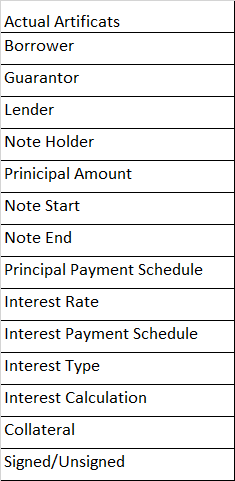

In [ ]:
var=Borrower,Guarantor,Lender,Note Holder,Prinicipal Amount,Note Start,Note End,Principal Payment Schedule,Interest Rate,Interest Payment Schedule,Interest Type,Interest Calculation,Collateral(descripton Of Land),Signed/Unsigned(yes/No).

In [ ]:
# Tune Model
generation_config = {
  "temperature": 0.55,
  "top_p": 0.75,
  "top_k": 27,
  "max_output_tokens": 4098,
}

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",generation_config=generation_config)

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert Debt instrument data like Borrower,Guarantor(if Found Mention else NG),Lender,Note Holder(if found mention else mention No Note Holder),Prinicipal Amount(Ballon/Monthly),Note Start Date(MM-DD-YY),Note Maturity Date(MM-DD-YY),Principal Payment Schedule(Ballon/Monthly),Interest Rate(Only In %),Interest Payment Schedule(Ballon/Monthly/Other),Interest Type(Fixed/Variable),Interest Calculation(For how many days interest is Calculated/360),Collateral(descripton Of Land),Document Signed/Unsigned(yes/No),into json format with appropriate json tags as required for the data in image ",
        },
        {"type": "image_url", "image_url": "/content/Usertest8.PNG"},
    ]
)
message1=llm.invoke([message])
# response=print(message1.content)
# response

In [ ]:
# Automate response of AI To DataFrame

In [ ]:
import pandas as pd
import json

columns = ["UserID","Borrower", "Guarantor", "Lender", "Note Holder", "Principal Amount",
           "Note Start Date", "Note Maturity Date", "Principal Payment Schedule", "Interest Rate",
           "Interest Payment Schedule", "Interest Type","Interest Calculation","Collateral","Document Signed/Unsigned"]
df = pd.DataFrame(columns=columns)

In [ ]:

data_str = message1.content.replace("```json\n", "").replace("```", "").strip()

try:
    data = json.loads(data_str)

    df = df.append(pd.Series(data, index=columns), ignore_index=True)

    df.head()

except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    print(f"Raw content: {data_str}")

except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    print(f"Raw content: {data_str}")


<ipython-input-41-0a726414d428>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(data, index=columns), ignore_index=True)


In [ ]:
df.head(10)

,UserID,Borrower,Guarantor,Lender,Note Holder,Principal Amount,Note Start Date,Note Maturity Date,Principal Payment Schedule,Interest Rate,Interest Payment Schedule,Interest Type,Interest Calculation,Collateral,Document Signed/Unsigned
0,Usertest1.png,RICHARD LABICKI,NG,"Tyler, Texas",No Note Holder,"$54,000.00",02-13-2012,02-13-2027,Monthly,10%,Monthly,Fixed,360,Land,yes
1,Usertest2.png,Jay D. Dudley,NG,"Real Estate Lending Group, L.L.C.",No Note Holder,"$130,000.00",05-25-2012,07-01-2013,Monthly,12.00%,Monthly,Fixed,360,All that certain tract or parcel of land lying...,Yes
2,Usertest3.png,Triple Creek Trust,NG,Equity Trust Company Custodian FBO Craig Dean ...,No Note Holder,"$523,250.00",03-15-2021,12-15-2031,Monthly,3.00%,Monthly,Fixed,360,Property secured by Mortgage and Promissory No...,yes
3,Usertest4.png,"LaGrange, GA",NG,Equity Trust Company,No Note Holder,"$150,000",04-11-2017,04-11-2022,Monthly,4.5%,Monthly,Fixed,360,Description of Land,Yes
4,Usertest5.png,Forced Physics LLC,NG,Equity Trust Company dba Sterling Trust fbo St...,No Note Holder,"$50,000.00",10-25-2012,10-25-2015,Monthly,8%,Monthly,Fixed,360,Description of Land,Yes
5,Usertest6.png,RICHARD LABICKI,NG,No Lender Name Found,No Note Holder Found,"$53,000.00",05-15-2013,05-15-2038,Monthly,10%,Monthly,Fixed,360,Description of Land Not Found,Yes
6,Usertest7.png,"Walldox, LLC, a Texas Limited Liability Company",NG,"Equity Trust Company, Custodian, FBO Rebecca D...",No Note Holder,Three Hundred Thousand and No/100 Dollars ($30...,02-21-2022,03-23-2027,Monthly,Five Percent (5.0%),Monthly,Fixed,360,Description of Land,Yes
7,Usertest8.png,HEMET CHRISTIAN ASSEMBLY,NG,Equity Trust Company Custodian FBO William Wol...,No Note Holder,"$865,000.00",12-14-2022,12-14-2052,Monthly,6.75%,Monthly,Fixed,360,Description of Land,Yes


In [ ]:
df.to_csv('TestAutomation Promissory Note', index=False)



In [ ]:
df['UserID'][7]='Usertest8.png'

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",generation_config=generation_config)
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "You are an expert in understanding debt instruments such as Promissory Note,Deed Of Trust etc,for the provided image fetch Borrower,Guarantor,Lender,Note Holder,Prinicipal Amount,Note Start,Note End,Principal Payment Schedule,Interest Rate,Interest Payment Schedule,Interest Type,Convert Invoice data into json format with appropriate json tags as required for the data in image ",
        },
        {"type": "image_url", "image_url": "/content/Usertest1.PNG"},
    ]
)
llm.invoke([message])